# 02. 데이터 라벨링 산출물 분석 - 시각화
- 긍정으로 라벨링된 df_positive
  - Dataframe 구조 확인
  - 긍정 비율 확인
- 부정으로 라벨링된 df_negative
  - Dataframe 구조 확인
  - 부정 비율 확인
  - 클래스별 분포 확인
  - 범위별 분포 확인

## 1. 데이터셋 로드

In [1]:
import numpy as np
import pandas as pd

valid_class = ['0', '1', '2', '3', '4', '5']
filepath = '../data/Dataset_final_221128.csv'
dataset = pd.read_csv(filepath, index_col = 'id')

# 현재 0~12500, 14001~ 까지 라벨링됨
# 라벨링 다 되면 df_labeled = dataset
# df_labeled = pd.merge(dataset.iloc[0:12500], dataset.iloc[14001:], how='outer')
df_labeled = dataset
df_positive = df_labeled[(df_labeled["label"] == 1) & (df_labeled["label2"] == '-1')]
df_negative = df_labeled[(df_labeled["label"] == 0) & (df_labeled["label2"].isin(valid_class))]

### 시각화 라이브러리 로드

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

## 2. 긍정으로 라벨링된 df_positive 관련 데이터 분석 및 시각화

### 2.1 Dataframe 구조 확인¶

In [3]:
df_positive

,document,label,label2
id,,,
21,그래도 좋은 앱 만들어주셔서 감사합니다,1,-1
25,너무 좋네요,1,-1
26,이번 업데이트 아주 맘에 들어요 ㅠ,1,-1
27,그동안 플레이리스트 편집하려면 너무 귀찮았고 새 곡 추가해도 앨범 다시 열어줘야 했...,1,-1
28,진짜 최고 편해요 ㅠㅠ,1,-1
...,...,...,...
21825,음악을 검색하면 바로 음악을 들을 수 있어서 좋아요,1,-1
21826,업데이트 한 후 기타 미디어 재생 시 노래가 끊기지 않음,1,-1
21867,노래 잘듣고있습니다,1,-1


### 2.2 긍정 비율 확인

In [4]:
positive_ratio = (len(df_positive) / len(df_labeled)) * 100
print("긍정 비율 : %.4f%%" % positive_ratio)

긍정 비율 : 8.1669%


## 3. 부정으로 라벨링된 df_negative 관련 데이터 분석 및 시각화

### 3.1 Dataframe 구조 확인

In [5]:
df_negative

,document,label,label2
id,,,
1,몇년간 잘만 쓰고 있었는데요,0,0
2,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
3,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
4,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
5,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
21877,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
21878,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
21879,기가지니에서는 끊기네요,0,1


### 3.2 부정 비율 확인

In [6]:
negative_ratio = (len(df_negative) / len(df_labeled)) * 100
print("부정 비율 : %.4f%%" % negative_ratio)

부정 비율 : 91.4538%


### 3.3 클래스별 분포 확인

In [7]:
df_negative["label2"].unique()

array(['0', '3', '1', '2', '4', '5'], dtype=object)

In [8]:
def plotAsBar(df):
    series=df["label2"].value_counts(sort=False).sort_index() #.drop(['-1', '22'])
    
    y = [series[idx] for idx in range(len(series))]
    x = np.arange(len(y))    
    xlabel = ["단순부정", "앱개발", "서비스개발", "서비스기획", "콘텐츠운영", "IT기획"]
    
    plt.title("클래스 별 부정 라벨링 데이터")
    plt.bar(x, y, width=0.6)
    plt.xticks(x, xlabel)
    # plt.yticks(sorted(y))
    plt.xlabel("클래스", labelpad=10)
    plt.ylabel("부정 리뷰 수", labelpad=10)
    # plt.tick_params(axis='x', which='major', pad=15)
    plt.tick_params(axis='both', which='major', pad = 8)
    plt.rcParams["figure.figsize"] = (8,10)
    plt.show()

In [9]:
def plotAsPieChart(df):
    series = df["label2"].value_counts(sort=False).sort_index() #.drop(['-1', '22'])
    
    ratio = [series[idx]/len(series) for idx in range(len(series))]
    x = np.arange(len(ratio))    
    xlabel = ["단순부정", "앱 개발팀", "서비스 개발팀", "서비스 기획팀", "콘텐츠 운영팀", "IT 기획팀"]
    wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
    
    plt.title("클래스 별 부정 라벨링 데이터")
    plt.pie(ratio, labels = xlabel, autopct="%.1f%%", startangle=90, wedgeprops=wedgeprops)
    # plt.figure(figsize=(10,10))
    plt.rcParams["figure.figsize"] = (8,10)
    plt.show()

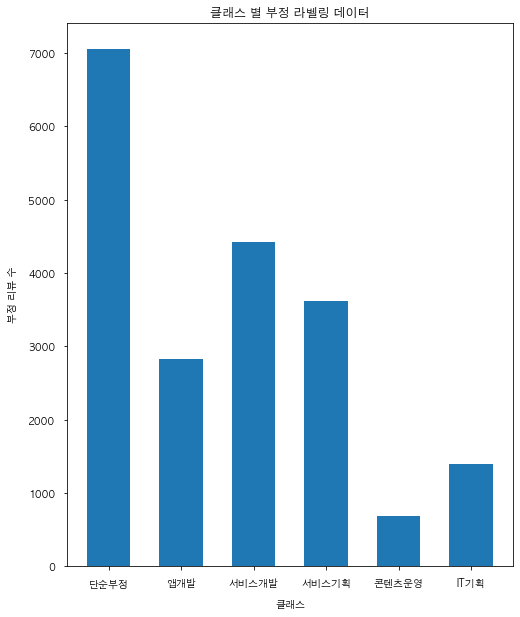

In [11]:
plotAsBar(df_negative)

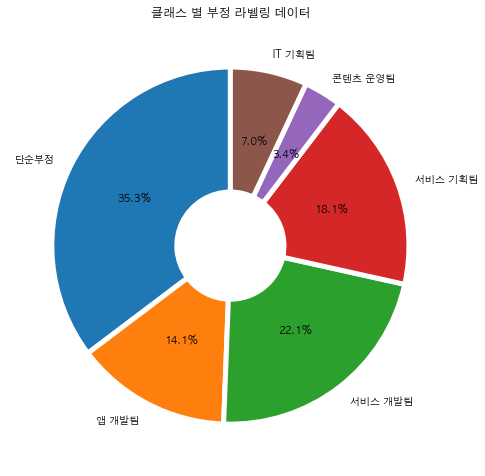

In [12]:
plotAsPieChart(df_negative)

### 3.4 범위별 분포 확인

#### 0~7000 번 부정 라벨 데이터

In [27]:
df_left = df_negative[0:5781]
df_left

,document,label,label2
id,,,
1,몇년간 잘만 쓰고 있었는데요,0,0
2,최근 업뎃이후로 너무 불편해서 리뷰를 다 써보러 와요,0,0
3,업뎃후 적응이야 늘 하는거지만 적당히 바껴야되는데,0,3
4,대체 좋아요 랑 댓글 위치까진ㅋㅋㅋㅋㅋ왜 바꾸는건짘ㅋㅋㅋㅠㅠ너무 자주 바뀌는 설정들...,0,0
5,군대 전역전까지 메롱쓰다가 년 전역후부터 지니뮤직으로 갈아탄후 계속 사용하고있는 유...,0,3
...,...,...,...
6996,팝송 너무 적어진것 같은데 요즘 다 권리사 요청으로 정지되었다는데 추가좀 해줘요 제발,0,4
6997,스트리밍으로 재생할 때 다음 노래로 넘어가는 데에 시간이 너무 오래 걸려요,0,1
6998,심할땐 분이상 걸려서 어플을 끄고 다시 켜서 사용중입니다,0,1


#### 7000~ 12500 부정 라벨 데이터 ( 7000 ~ 14000 이 정상범위)

In [26]:
df_mid = df_negative[5782:12326]
df_mid

,document,label,label2
id,,,
7002,와이파이도 연결되어 있지 않았고 자꾸 네트워크 문제라고 로그인이 안되네요,0,5
7003,멀쩡히 잘 들으면서 헬스하고 있었는데 갑자기 뚝 끊기더니 네트워크 문제래요,0,5
7004,대응좀 부탁 드립니다 아이폰 상단정보바와 겹쳐 지니뮤직앱 상단메뉴 검색 닫기 뒤로가...,0,3
7005,터치가 잘 안 됩니다,0,1
7006,잠금화면에서 노래가사가 안나오는데 업데이트하면서 바뀐건가요 아님,0,1
...,...,...,...
13996,빨리좀 조치 취해주세요 ㅡㅡ,0,0
13997,느린 건 걍 기다리면 되지만렉이 너무 심하네요 ㅠㅠ,0,2
13998,그리고 업데이트 한 김에 잠금화면에서도 가사를 누르면 가사있는부분으로 노래가 이동하...,0,3


#### 14000 ~ 21000 부정 라벨 데이터

In [28]:
df_right = df_negative[12326:]
df_right

,document,label,label2
id,,,
14001,정지가 끝나면 내가 선택한 음악은 무시하고 재생리스트 다른음악을 쳐틀고 있습니다,0,1
14002,아니 이 노래가 없는건 이상한거 같은데 추가 좀 해주세요,0,4
14003,저도 포인트만쓰고 걍 다시돌아갈겁니다,0,0
14004,요금제 통해서 부가서비스로 번호아이디 사용중인데 안드로이드 으로 업그레이드 이후부터...,0,2
14005,빠른 조치 바랍니다,0,0
...,...,...,...
21877,그리고 한시간전에 리뷰남겼는데 맘대로 삭제가 됐네요,0,2
21878,아니 왜 포인트에 관한게 하나도 안뜨냐 인터넷이랑 공지사항보고 하란대로 다했는데 포...,0,2
21879,기가지니에서는 끊기네요,0,1


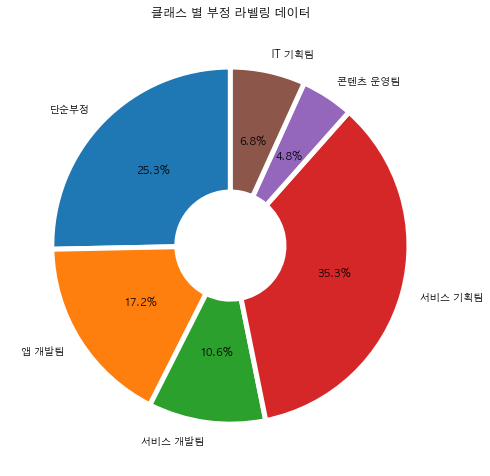

In [29]:
plotAsPieChart(df_left)

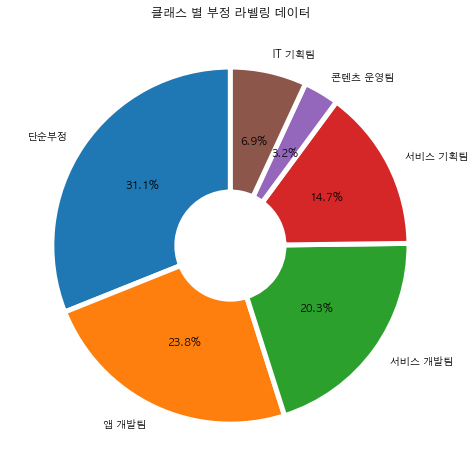

In [30]:
plotAsPieChart(df_mid)

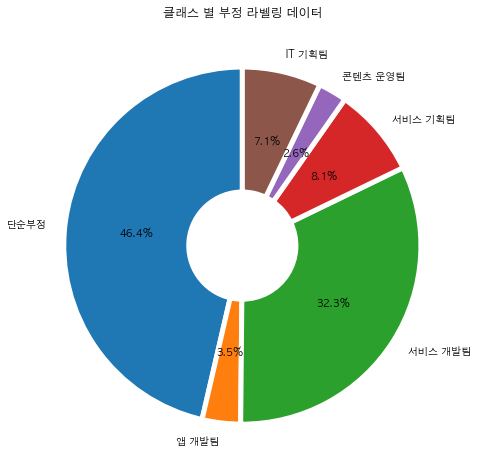

In [31]:
plotAsPieChart(df_right)

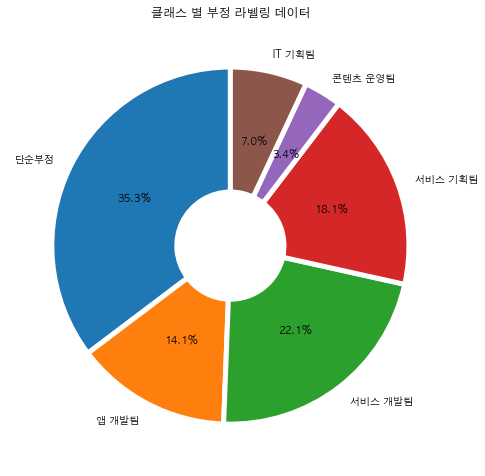

In [32]:
plotAsPieChart(df_negative)